# XGBoost

XGBoost is one of the implementations of gradient boosted trees. 

In [1]:
!pip install xgboost
!pip install ipynb

In [2]:
import xgboost as xgb
from xgboost import plot_tree
import matplotlib.pyplot as plt

from ipynb.fs.full.Functions import load_train_test_data, model_eval, run_gridsearchCV, run_randomizedsearchCV, load_model

In [3]:
X_train, X_test, y_train, y_test = load_train_test_data()

A snippet of our training data:


,Age,PhysicallyActive,BMI,Sleep,SoundSleep,JunkFood,Stress,BPLevel,Pregnancies,UrinationFreq,BMI_high,highBP_yes,RegularMedicine_yes,Pdiabetes_yes,Alcohol_yes,Gender_Male,Smoking_yes,Family_Diabetes_yes
188,3.0,0.0,-0.514087,-0.775318,-0.293345,0.0,1.0,2.0,-0.416387,0.0,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
145,0.0,2.0,-1.261602,0.026431,-0.293345,0.0,0.0,1.0,-0.416387,0.0,0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
87,3.0,1.0,-2.009116,-2.378816,-0.838128,0.0,2.0,2.0,-0.416387,1.0,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
262,3.0,2.0,-0.887844,0.828180,-0.838128,0.0,1.0,1.0,-0.416387,1.0,0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
45,1.0,1.0,-0.887844,-0.775318,0.251438,0.0,1.0,0.0,-0.416387,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


There are 232 entries with 18 columns in our training data.
There are 41 entries with 18 columns in our testing data.


In [4]:
xgb_classifier = xgb.XGBClassifier(seed=0).fit(X_train,y_train)

In [5]:
print(xgb_classifier)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)


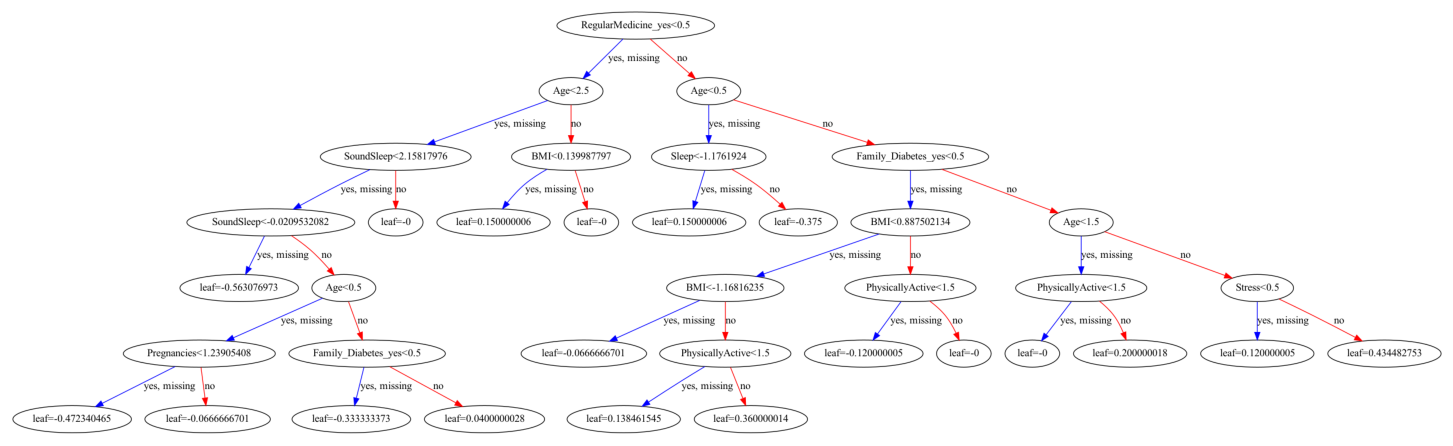

In [6]:
# Visualize
plot_tree(xgb_classifier)
plt.gcf().set_size_inches(18.5, 10.5)


Evaluation: accuracy_score
93.97% for the train data
80.49% for the test data

Evaluation: f1_score
90.54% for the train data
66.67% for the test data

Evaluation: recall_score
89.33% for the train data
61.54% for the test data

Evaluation: precision_score
91.78% for the train data
72.73% for the test data

Evaluation: confusion_matrix


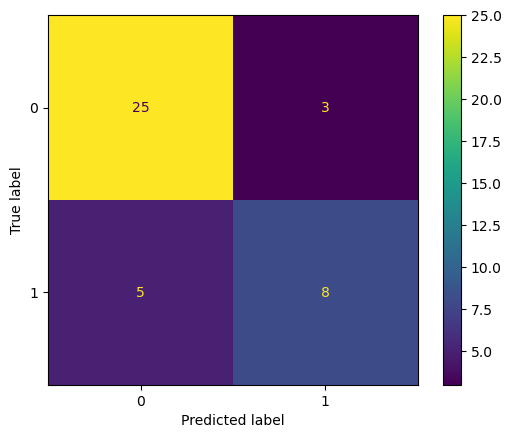


Evaluation: roc


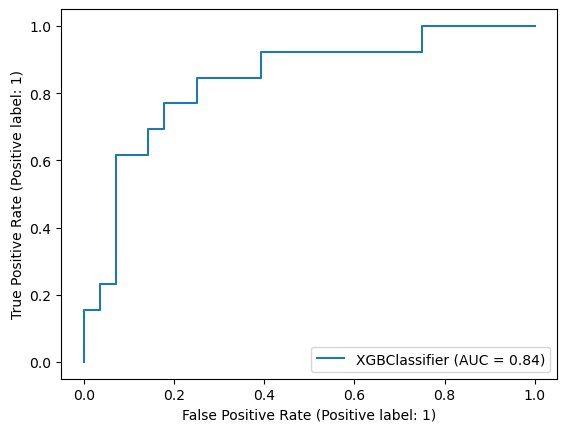

[(0.9396551724137931, 0.8048780487804879),
 (0.9054054054054055, 0.6666666666666667),
 (0.8933333333333333, 0.6153846153846154),
 (0.9178082191780822, 0.7272727272727273)]

In [7]:
# evaluation
model_eval(xgb_classifier, X_train, X_test, y_train, y_test, confusion=True, roc=True)

In [8]:
grid_params = {
        'max_depth': [3, 4, 5, 6],
        'n_estimators': [60, 100, 140, 200],
        'learning_rate': [0.3, 0.1, 0.01, 0.05]
        }

run_gridsearchCV(xgb_classifier, grid_params, X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits
[CV] END ....learning_rate=0.3, max_depth=3, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.3, max_depth=3, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.3, max_depth=3, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.3, max_depth=3, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.3, max_depth=3, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.3, max_depth=3, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.3, max_depth=3, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.3, max_depth=3, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.3, max_depth=3, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.3, max_depth=3, n_estimators=60; total time=   0.1s
[CV] END ...learning_rate=0.3, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.3, max_depth=3, n_

[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=140; total time=   0.2s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=140; total time=   0.1s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=140; total time=   0.2s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=140; total time=   0.2s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=140; total time=   0.3s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=140; total time=   0.2s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=140; total time=   0.2s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=140; total time=   0.2s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=140; total time=   0.2s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=200; total time=   0.3s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=200; total time=   0.3s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=200; total time=   0.3s
[CV] END ...learning_rate=0.

[CV] END ....learning_rate=0.1, max_depth=4, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.1, max_depth=4, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.1, max_depth=4, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.1, max_depth=4, n_estimators=60; total time=   0.2s
[CV] END ....learning_rate=0.1, max_depth=4, n_estimators=60; total time=   0.2s
[CV] END ....learning_rate=0.1, max_depth=4, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.1, max_depth=4, n_estimators=60; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   0.5s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   0.2s
[CV] END ...learning_rate=0.

[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=140; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=140; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=140; total time=   0.5s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=140; total time=   0.4s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=140; total time=   0.4s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=200; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=200; total time=   0.5s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=200; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=200; total time=   0.4s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=200; total time=   0.4s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=200; total time=   0.4s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=200; total time=   0.3s
[CV] END ...learning_rate=0.

[CV] END ...learning_rate=0.01, max_depth=5, n_estimators=60; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=140; total time=   0.2s
[CV] END ..learning_rate=0.0

[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ...learning_rate=0.05, max_depth=4, n_estimators=60; total time=   0.1s
[CV] END ...learning_rate=0.05, max_depth=4, n_estimators=60; total time=   0.1s
[CV] END ...learning_rate=0.05, max_depth=4, n_estimators=60; total time=   0.1s
[CV] END ...learning_rate=0.05, max_depth=4, n_estimators=60; total time=   0.1s
[CV] END ...learning_rate=0.

[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=140; total time=   0.3s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=140; total time=   0.3s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=140; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=140; total time=   0.3s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=140; total time=   0.3s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=140; total time=   0.3s
[CV] END ..learning_rate=0.0


Evaluation: accuracy_score
86.21% for the train data
80.49% for the test data

Evaluation: f1_score
78.67% for the train data
69.23% for the test data

Evaluation: recall_score
78.67% for the train data
69.23% for the test data

Evaluation: precision_score
78.67% for the train data
69.23% for the test data

Evaluation: confusion_matrix


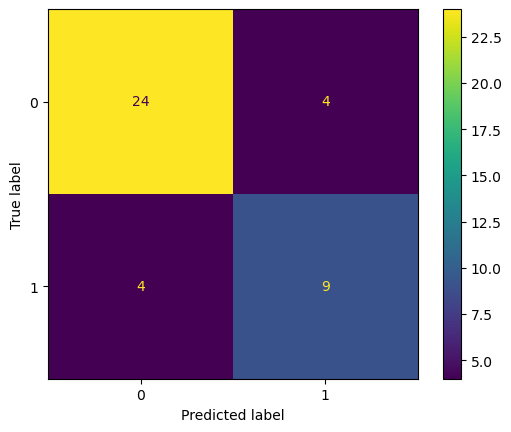


Evaluation: roc


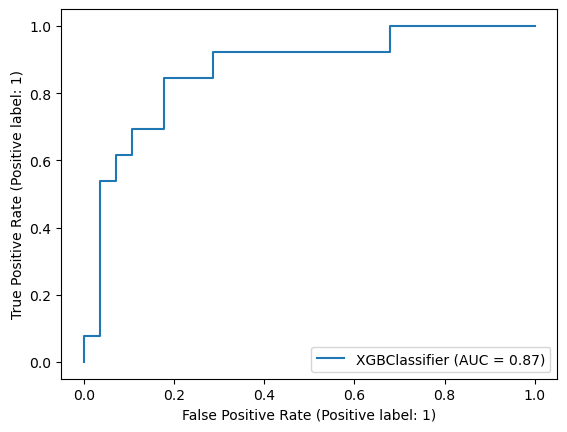

[(0.8620689655172413, 0.8048780487804879),
 (0.7866666666666666, 0.6923076923076923),
 (0.7866666666666666, 0.6923076923076923),
 (0.7866666666666666, 0.6923076923076923)]

In [10]:
acc_best_model = load_model(xgb_classifier, 'accuracy')
model_eval(acc_best_model, X_train, X_test, y_train, y_test, confusion=True, roc=True)

In [11]:
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

random_params = {
    'max_depth': sp_randInt(3, 10),
    'n_estimators': sp_randInt(50, 100),
    'learning_rate': sp_randFloat()
}
run_randomizedsearchCV(xgb_classifier, random_params, X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END learning_rate=0.5488135039273248, max_depth=8, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.5488135039273248, max_depth=8, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.5488135039273248, max_depth=8, n_estimators=50; total time=   0.2s
[CV] END learning_rate=0.5488135039273248, max_depth=8, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.5488135039273248, max_depth=8, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.5488135039273248, max_depth=8, n_estimators=50; total time=   0.2s
[CV] END learning_rate=0.5488135039273248, max_depth=8, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.5488135039273248, max_depth=8, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.5488135039273248, max_depth=8, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.5488135039273248, max_depth=8, n_estimators=50; total time=   0.1s
[CV] END learning

[CV] END learning_rate=0.832619845547938, max_depth=9, n_estimators=65; total time=   0.1s
[CV] END learning_rate=0.8700121482468192, max_depth=5, n_estimators=85; total time=   0.1s
[CV] END learning_rate=0.8700121482468192, max_depth=5, n_estimators=85; total time=   0.1s
[CV] END learning_rate=0.8700121482468192, max_depth=5, n_estimators=85; total time=   0.1s
[CV] END learning_rate=0.8700121482468192, max_depth=5, n_estimators=85; total time=   0.1s
[CV] END learning_rate=0.8700121482468192, max_depth=5, n_estimators=85; total time=   0.1s
[CV] END learning_rate=0.8700121482468192, max_depth=5, n_estimators=85; total time=   0.1s
[CV] END learning_rate=0.8700121482468192, max_depth=5, n_estimators=85; total time=   0.1s
[CV] END learning_rate=0.8700121482468192, max_depth=5, n_estimators=85; total time=   0.1s
[CV] END learning_rate=0.8700121482468192, max_depth=5, n_estimators=85; total time=   0.1s
[CV] END learning_rate=0.8700121482468192, max_depth=5, n_estimators=85; total ti


Evaluation: accuracy_score
93.97% for the train data
80.49% for the test data

Evaluation: f1_score
90.79% for the train data
63.64% for the test data

Evaluation: recall_score
92.00% for the train data
53.85% for the test data

Evaluation: precision_score
89.61% for the train data
77.78% for the test data

Evaluation: confusion_matrix


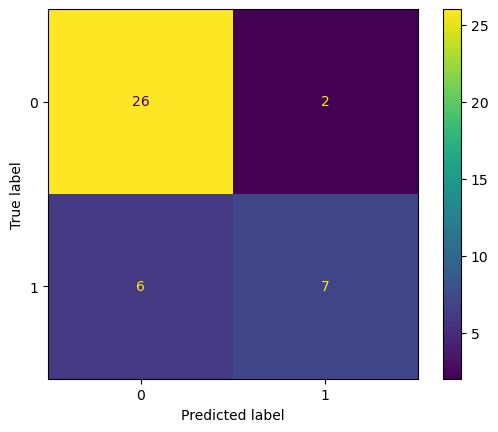


Evaluation: roc


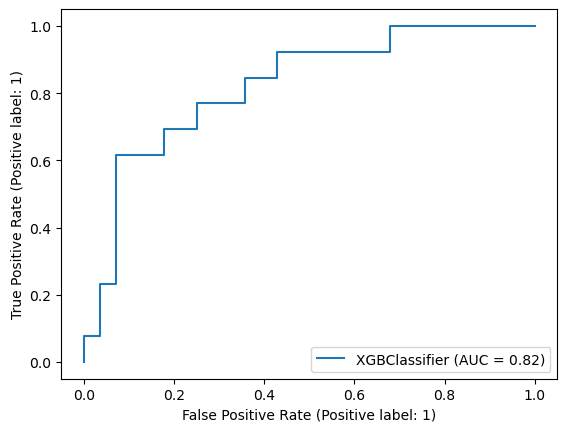

[(0.9396551724137931, 0.8048780487804879),
 (0.9078947368421053, 0.6363636363636364),
 (0.92, 0.5384615384615384),
 (0.8961038961038961, 0.7777777777777778)]

In [12]:
acc_best_model = load_model(xgb_classifier, 'accuracy', search='random')
model_eval(acc_best_model, X_train, X_test, y_train, y_test, confusion=True, roc=True)

In [13]:
from ipynb.fs.full.Functions import load_train_test_oversampled

In [14]:
X_train, X_test, y_train, y_test = load_train_test_oversampled()

A snippet of our training data:


,Age,PhysicallyActive,BMI,Sleep,SoundSleep,JunkFood,Stress,BPLevel,Pregnancies,UrinationFreq,BMI_high,highBP_yes,RegularMedicine_yes,Pdiabetes_yes,Alcohol_yes,Gender_Male,Smoking_yes,Family_Diabetes_yes
0,0.0,2.0,1.354699,0.828180,-0.838128,0.0,1.0,1.0,-0.416387,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,1.0,0.794063,-0.775318,-1.927694,1.0,3.0,2.0,-0.416387,0.0,1,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,3.0,1.0,0.420306,0.828180,1.341005,0.0,0.0,1.0,-0.416387,1.0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,2.0,2.289092,0.828180,-0.838128,0.0,1.0,1.0,-0.416387,1.0,1,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,-0.514087,-1.577067,-0.293345,3.0,1.0,1.0,-0.416387,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


There are 258 entries with 18 columns in our training data.
There are 82 entries with 18 columns in our testing data.


In [15]:
xgb_classifier = xgb.XGBClassifier(seed=0).fit(X_train,y_train)
print(xgb_classifier)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)



Evaluation: accuracy_score
96.90% for the train data
69.51% for the test data

Evaluation: f1_score
96.95% for the train data
54.55% for the test data

Evaluation: recall_score
98.45% for the train data
57.69% for the test data

Evaluation: precision_score
95.49% for the train data
51.72% for the test data

Evaluation: confusion_matrix


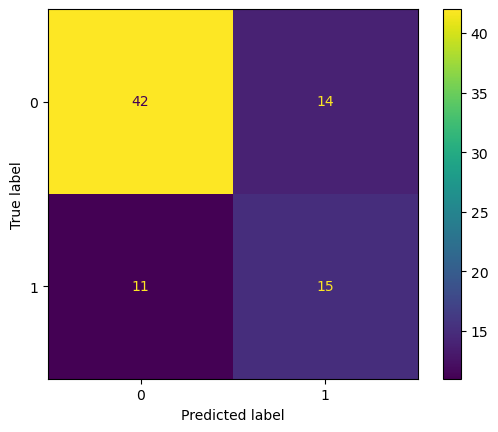


Evaluation: roc


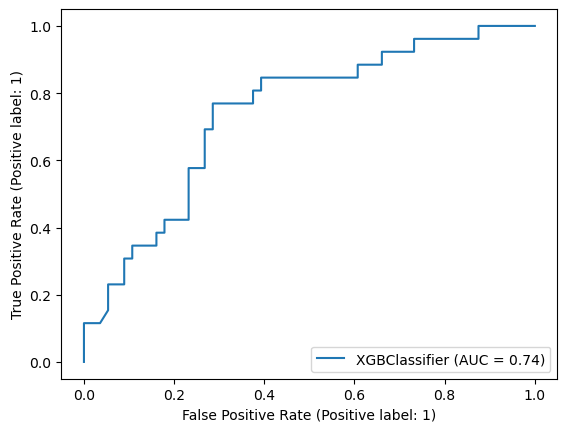

[(0.9689922480620154, 0.6951219512195121),
 (0.9694656488549618, 0.5454545454545454),
 (0.9844961240310077, 0.5769230769230769),
 (0.9548872180451128, 0.5172413793103449)]

In [16]:
model_eval(xgb_classifier, X_train, X_test, y_train, y_test, confusion=True, roc=True)

In [17]:
grid_params = {
        'max_depth': [3, 4, 5, 6],
        'n_estimators': [60, 100, 140, 200],
        'learning_rate': [0.3, 0.1, 0.01, 0.05]
        }

run_gridsearchCV(xgb_classifier, grid_params, X_train, y_train, ros="ros")

Fitting 10 folds for each of 64 candidates, totalling 640 fits
[CV] END ....learning_rate=0.3, max_depth=3, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.3, max_depth=3, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.3, max_depth=3, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.3, max_depth=3, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.3, max_depth=3, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.3, max_depth=3, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.3, max_depth=3, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.3, max_depth=3, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.3, max_depth=3, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.3, max_depth=3, n_estimators=60; total time=   0.1s
[CV] END ...learning_rate=0.3, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.3, max_depth=3, n_

[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=140; total time=   0.4s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=140; total time=   0.4s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=140; total time=   0.2s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=140; total time=   0.2s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=140; total time=   0.3s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=140; total time=   0.2s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=140; total time=   0.2s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=140; total time=   0.2s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=140; total time=   0.3s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=200; total time=   0.3s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=200; total time=   0.4s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=200; total time=   1.0s
[CV] END ...learning_rate=0.

[CV] END ....learning_rate=0.1, max_depth=4, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.1, max_depth=4, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.1, max_depth=4, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.1, max_depth=4, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.1, max_depth=4, n_estimators=60; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   0.2s
[CV] END ...learning_rate=0.

[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=140; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=140; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=200; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=200; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=200; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=200; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=200; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=200; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=200; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=200; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=200; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=200; total time=   0.3s
[CV] END ...learning_rate=0.

[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=140; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=140; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=140; total time=   0.2s
[CV] END ..learning_rate=0.0

[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.4s
[CV] END ...learning_rate=0.05, max_depth=4, n_estimators=60; total time=   0.1s
[CV] END ...learning_rate=0.05, max_depth=4, n_estimators=60; total time=   0.1s
[CV] END ...learning_rate=0.05, max_depth=4, n_estimators=60; total time=   0.1s
[CV] END ...learning_rate=0.05, max_depth=4, n_estimators=60; total time=   0.1s
[CV] END ...learning_rate=0.05, max_depth=4, n_estimators=60; total time=   0.1s
[CV] END ...learning_rate=0.

[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=140; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=140; total time=   0.3s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=140; total time=   0.3s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=140; total time=   0.4s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=140; total time=   0.4s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=140; total time=   0.3s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=140; total time=   0.3s
[CV] END ..learning_rate=0.0


Evaluation: accuracy_score
96.90% for the train data
69.51% for the test data

Evaluation: f1_score
96.95% for the train data
54.55% for the test data

Evaluation: recall_score
98.45% for the train data
57.69% for the test data

Evaluation: precision_score
95.49% for the train data
51.72% for the test data

Evaluation: confusion_matrix


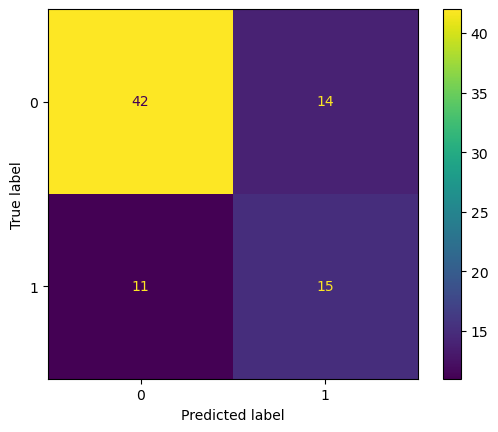


Evaluation: roc


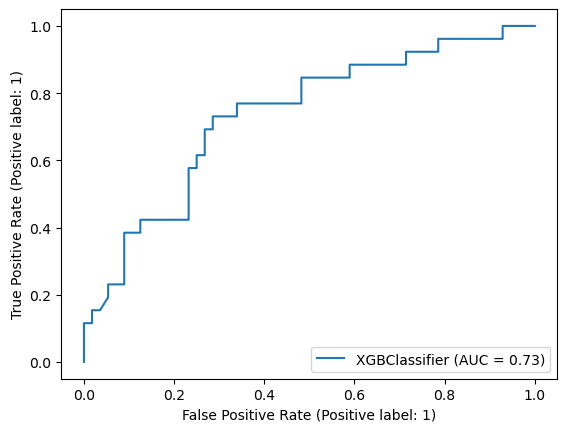

[(0.9689922480620154, 0.6951219512195121),
 (0.9694656488549618, 0.5454545454545454),
 (0.9844961240310077, 0.5769230769230769),
 (0.9548872180451128, 0.5172413793103449)]

In [18]:
acc_best_model = load_model(xgb_classifier, 'accuracy')
model_eval(acc_best_model, X_train, X_test, y_train, y_test, confusion=True, roc=True)

In [21]:
run_gridsearchCV(xgb_classifier, grid_params, X_train, y_train, scoring='recall', ros='ros')

Fitting 10 folds for each of 64 candidates, totalling 640 fits
[CV] END ....learning_rate=0.3, max_depth=3, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.3, max_depth=3, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.3, max_depth=3, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.3, max_depth=3, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.3, max_depth=3, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.3, max_depth=3, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.3, max_depth=3, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.3, max_depth=3, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.3, max_depth=3, n_estimators=60; total time=   0.0s
[CV] END ....learning_rate=0.3, max_depth=3, n_estimators=60; total time=   0.1s
[CV] END ...learning_rate=0.3, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.3, max_depth=3, n_

[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=140; total time=   0.2s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=140; total time=   0.2s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=140; total time=   0.2s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=140; total time=   0.2s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=140; total time=   0.2s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=140; total time=   0.2s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=140; total time=   0.2s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=140; total time=   0.2s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=140; total time=   0.2s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=200; total time=   0.3s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=200; total time=   0.3s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=200; total time=   0.4s
[CV] END ...learning_rate=0.

[CV] END ....learning_rate=0.1, max_depth=4, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.1, max_depth=4, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.1, max_depth=4, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.1, max_depth=4, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.1, max_depth=4, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.1, max_depth=4, n_estimators=60; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.

[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=140; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=140; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=140; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=140; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=200; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=200; total time=   0.4s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=200; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=200; total time=   0.4s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=200; total time=   0.5s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=200; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=200; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=200; total time=   0.4s
[CV] END ...learning_rate=0.

[CV] END ...learning_rate=0.01, max_depth=5, n_estimators=60; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=140; total time=   0.2s
[CV] END ..learning_rate=0.0

[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ...learning_rate=0.05, max_depth=4, n_estimators=60; total time=   0.1s
[CV] END ...learning_rate=0.05, max_depth=4, n_estimators=60; total time=   0.1s
[CV] END ...learning_rate=0.05, max_depth=4, n_estimators=60; total time=   0.1s
[CV] END ...learning_rate=0.

[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=140; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=140; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=140; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=140; total time=   0.3s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=140; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=140; total time=   0.3s
[CV] END ..learning_rate=0.0


Evaluation: accuracy_score
96.90% for the train data
68.29% for the test data

Evaluation: f1_score
96.95% for the train data
51.85% for the test data

Evaluation: recall_score
98.45% for the train data
53.85% for the test data

Evaluation: precision_score
95.49% for the train data
50.00% for the test data

Evaluation: confusion_matrix


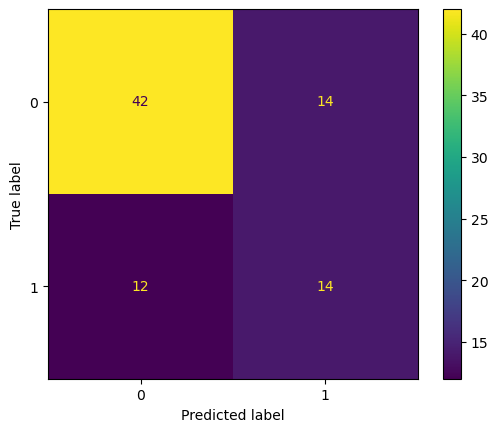


Evaluation: roc


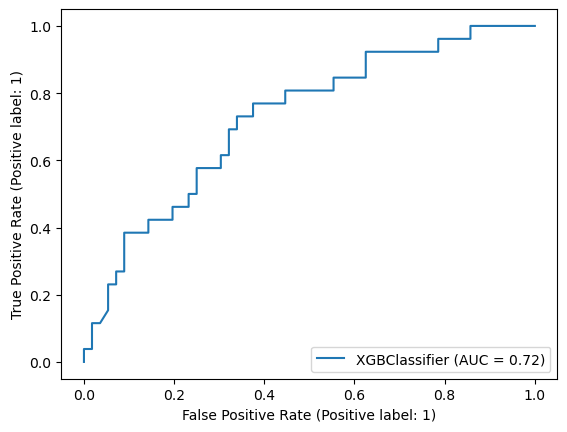

[(0.9689922480620154, 0.6829268292682927),
 (0.9694656488549618, 0.5185185185185186),
 (0.9844961240310077, 0.5384615384615384),
 (0.9548872180451128, 0.5)]

In [22]:
recall_best_model = load_model(xgb_classifier, 'recall', ros='ros')
model_eval(recall_best_model, X_train, X_test, y_train, y_test, confusion=True, roc=True)